# MNIST Convent Classificator with TensorFlow

In [1]:
from tensorflow import keras
from matplotlib import pyplot as plt

## Построение модели
Все слои Conv2D и MaxPooling2D выводят трехмерный тензор с формой (высота, ширина, каналы). Измерения ширины и высоты сжимаются с ростом глубины сети. Количество каналов управляется первым аргументом, передаваемым в слои Conv2D (32, 64 или 128). Последний слой Conv2D выдает результат с формой (3, 3, 128) — карту признаков 3 × 3 со 128 каналами. Следующий шаг — передача этого результата на вход полносвязной классифицирующей сети: стека слоев Dense. Эти классификаторы обрабатывают векторы — одномерные массивы, — тогда как текущий выход является трехмерным тензором. Чтобы преодолеть это несоответствие, мы преобразуем трехмерный вывод в одномерный c помощью слоя Flatten, а затем добавляем полносвязные слои Dense. В заключение выполняется классификация по десяти категориям, поэтому последний слой имеет десять выходов и активацию softmax.

In [2]:
inputs = keras.Input(shape=(28, 28, 1))
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='MNISTConvClassificator')
model.summary()

Model: "MNISTConvClassificator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

## Обучение модели
Теперь обучим сверточную сеть распознаванию цифр MNIST. Поскольку модель выполняет классификацию по десяти категориям с активацией softmax, мы используем функцию потерь категориальной перекрестной энтропии, а так как метки являются целыми числами, нам понадобится разреженная версия sparse_categorical_crossentropy.

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size=64
)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8821 - loss: 0.3676
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9845 - loss: 0.0505
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9894 - loss: 0.0336
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9935 - loss: 0.0208
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9950 - loss: 0.0169


## Оценка модели на тестовых данных

In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9867 - loss: 0.0384
Test accuracy: 0.990


## Графики обучения

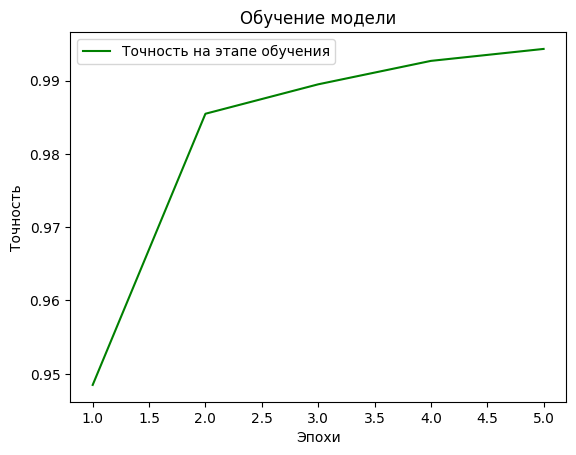

In [5]:
acc = history.history['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'g', label='Точность на этапе обучения')
plt.title('Обучение модели')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()